In [39]:
import os
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np

%matplotlib inline



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [40]:
num_epochs = 50
batch_size = 100
l_r = 0.0001

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

ds = datasets.MNIST('./data', transform=trans)

dl = DataLoader(ds, batch_size=batch_size, shuffle=True)



In [46]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(784, 128), nn.Tanh(), nn.Linear(128, 64), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(64, 128),nn.Tanh(),nn.Linear(128, 784),nn.Tanh())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')



In [47]:
ae = AE()
loss_calculator = nn.MSELoss()
adam_optimize = torch.optim.Adam(ae.parameters(), lr=l_r, weight_decay=1e-3)


('Loss after Epoch #{} =  {.4f}', 1, 0.27001050114631653)
('Loss after Epoch #{} =  {.4f}', 2, 0.24928219616413116)
('Loss after Epoch #{} =  {.4f}', 3, 0.2275378406047821)
('Loss after Epoch #{} =  {.4f}', 4, 0.21015428006649017)
('Loss after Epoch #{} =  {.4f}', 5, 0.19944311678409576)
('Loss after Epoch #{} =  {.4f}', 6, 0.17931927740573883)
('Loss after Epoch #{} =  {.4f}', 7, 0.1794300228357315)
('Loss after Epoch #{} =  {.4f}', 8, 0.18017616868019104)
('Loss after Epoch #{} =  {.4f}', 9, 0.17362138628959656)
('Loss after Epoch #{} =  {.4f}', 10, 0.1684252768754959)
('Loss after Epoch #{} =  {.4f}', 11, 0.16684044897556305)
('Loss after Epoch #{} =  {.4f}', 12, 0.1750260889530182)
('Loss after Epoch #{} =  {.4f}', 13, 0.16345666348934174)
('Loss after Epoch #{} =  {.4f}', 14, 0.17186576128005981)
('Loss after Epoch #{} =  {.4f}', 15, 0.16881470382213593)
('Loss after Epoch #{} =  {.4f}', 16, 0.16463856399059296)
('Loss after Epoch #{} =  {.4f}', 17, 0.16407707333564758)
('Loss aft

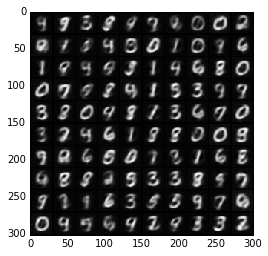

In [48]:
for epoch in range(1, num_epochs+1):
    for d in dl:
        i, l = d
        i = Variable(i.view(i.size(0), -1)) # Converting the image into the required input vector format
        o = ae(i) #output vector of the model
        loss_val = loss_calculator(o, i)
        adam_optimize.zero_grad()
        loss_val.backward()
        adam_optimize.step()
    print("Loss after Epoch #{} =  {.4f}", epoch, loss_val.data[0])
    if epoch%10==0:
        out = o.data
        out = out.view(out.size(0), 1, 28, 28)
        show(make_grid(out, nrow=10,normalize=True))

        

torch.save(ae.state_dict(), './se.pth')
        
        